# Chapter 11: How to make predictions with a multiple regression model

In [4]:
import pandas as pd
import seaborn as sns


## The Cars dataset

In [10]:
import pandas as pd

In [12]:
carsData = pd.read_csv('cars.csv')
#carsData = pd.DataFrame('cars.csv')

In [6]:
carsData.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
carsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# How to create a simple regression model

C:\Users\dolly\AppData\Local\Temp\ipykernel_836\1587165059.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=carsData.corr()[['price']].sort_values('price', ascending=False),


<Axes: >

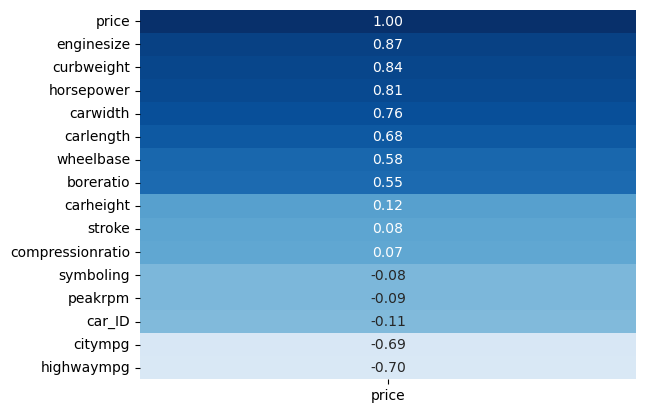

In [8]:
sns.heatmap(data=carsData.corr()[['price']].sort_values('price', ascending=False), 
            annot=True, cmap='Blues', vmin=-1.0, vmax=1.0, cbar=False, fmt='.2f')

In [9]:
sns.pairplot(carsData)

<Axes: xlabel='price', ylabel='enginesize'>

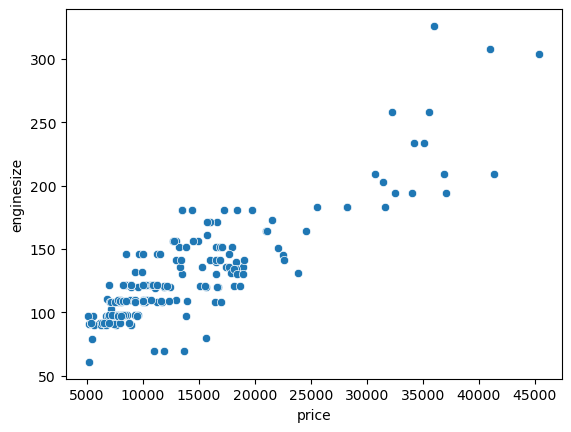

In [ ]:
sns.scatterplot(data=carsData, x= 'price',y='enginesize')

In [2]:
%pip install scikit-learn  --upgrade --force
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split

     ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
     - -------------------------------------- 0.3/8.3 MB 6.5 MB/s eta 0:00:02
     ----- ---------------------------------- 1.2/8.3 MB 12.7 MB/s eta 0:00:01
     ---------- ----------------------------- 2.2/8.3 MB 15.6 MB/s eta 0:00:01
     --------------- ------------------------ 3.2/8.3 MB 17.0 MB/s eta 0:00:01
     -------------------- ------------------- 4.1/8.3 MB 17.7 MB/s eta 0:00:01
     ------------------------- -------------- 5.2/8.3 MB 18.4 MB/s eta 0:00:01
     ----------------------------- ---------- 6.2/8.3 MB 18.9 MB/s eta 0:00:01
     ---------------------------------- ----- 7.2/8.3 MB 19.1 MB/s eta 0:00:01
     ---------------------------------------  8.1/8.3 MB 19.2 MB/s eta 0:00:01
     ---------------------------------------- 8.3/8.3 MB 18.2 MB/s eta 0:00:00
     ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
     -- ------------------------------------- 0.9/14.8 MB 27.7 MB/s 

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
carsData.shape

(205, 27)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    carsData[['enginesize']], carsData[['price']],
    test_size=0.20, random_state=400)

model = LinearRegression()
model.fit(x_train, y_train)

model.score(x_test,y_test)

0.7803344516015935

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 29 is different from 3)

In [ ]:
y_predicted = model.predict(x_test)
model.score(y_predicted, y_test)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 29 is different from 3)

In [ ]:
# create DataFrame for the price predictions
predicted = pd.DataFrame(y_predicted, columns=['predictedPrice'])

# combine the test data and the predicted data into a frame
final = predicted.join([x_test.reset_index(drop=True), 
                        y_test.reset_index(drop=True)])
final[['enginesize','price','predictedPrice']].head()

,enginesize,price,predictedPrice
0,136,15250.0,15301.260359
1,90,8916.5,6226.792393
2,92,8778.0,8011.943107
3,203,31400.5,38875.836922
4,92,6488.0,6455.140577


## How to plot the residuals of a simple regression

In [ ]:
final['residual'] = final.price - final.predictedPrice
final.head(2)

,predictedPrice,enginesize,curbweight,high_price,price,residual
0,15301.260359,136,2507,0,15250.0,-51.260359
1,6226.792393,90,1874,0,8916.5,2689.707607


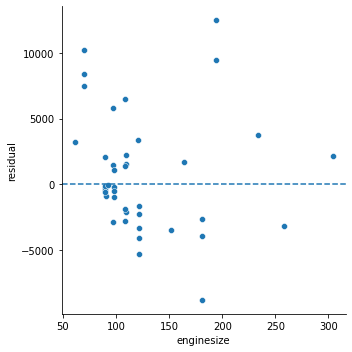

In [ ]:
g = sns.relplot(data=final, x='enginesize', y='residual', kind='scatter')
for ax in g.axes.flat:
    ax.axhline(0, ls='--')

<AxesSubplot:xlabel='residual', ylabel='Density'>

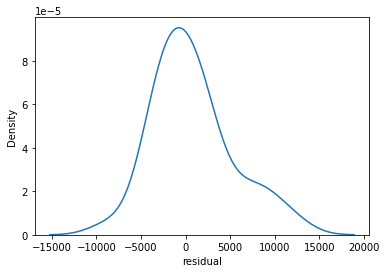

In [ ]:
sns.kdeplot(data=final, x='residual')

In [ ]:
# error bars
final['residual_bin'] = pd.qcut(final["residual"],q=7)

In [ ]:
final.groupby(['residual_bin']).residual.mean()

residual_bin
(-8823.573, -3224.975]   -4840.651029
(-3224.975, -2013.322]   -2649.092276
(-2013.322, -510.782]    -1108.776472
(-510.782, 927.198]       -240.296860
(927.198, 2120.865]       1527.113581
(2120.865, 6012.415]      3421.308447
(6012.415, 12494.512]     9102.060227
Name: residual, dtype: float64

In [ ]:
final.residual_bin.value_counts(normalize=True)

(-8823.573, -3224.975]    0.146341
(-3224.975, -2013.322]    0.146341
(-2013.322, -510.782]     0.146341
(927.198, 2120.865]       0.146341
(2120.865, 6012.415]      0.146341
(6012.415, 12494.512]     0.146341
(-510.782, 927.198]       0.121951
Name: residual_bin, dtype: float64

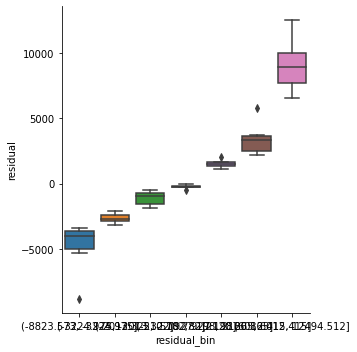

In [ ]:
sns.catplot(data = final , kind='box', y="residual",x="residual_bin" )

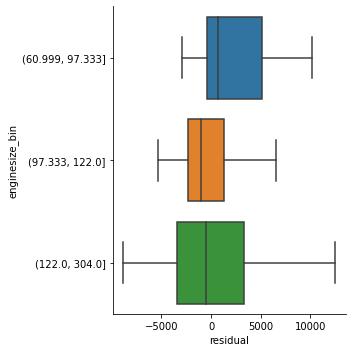

In [ ]:
final["enginesize_bin"] = pd.qcut(final.enginesize, q=3)
sns.catplot(data = final , kind='box', y="enginesize_bin",x="residual" , orient='h')

# How to create a multiple regression model

In [ ]:
carsData["high_price"] = (carsData["price"] > 27500).astype(int)
carsData.high_price.value_counts()

0    188
1     17
Name: high_price, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    carsData[['enginesize','curbweight','high_price']], carsData[['price']], 
    test_size=0.20, random_state=20)

model = LinearRegression()
model.fit(x_train, y_train)
y_predicted = model.predict(x_test)
model.score(x_test, y_test)
# one variable r-squared = 0.7063964117029844

0.8102894711276061

In [ ]:
model.score(x_train, y_train)

0.8806361942333603

In [ ]:
y_predicted = model.predict(x_test)

## How to prepare and plot the multiple regression

In [ ]:
# create the DataFrame for the price predictions
predicted = pd.DataFrame(y_predicted, columns=['predictedPrice'])

# combine the test data and the predicted data into a DataFrame
final = predicted.join([x_test.reset_index(drop=True), 
                        y_test.reset_index(drop=True)])
final.head()[['enginesize','curbweight','price','predictedPrice']]

,enginesize,curbweight,price,predictedPrice
0,136,2507,15250.0,12230.080774
1,90,1874,8916.5,6539.555315
2,92,3110,8778.0,15010.691194
3,203,3366,31400.5,33034.208136
4,92,2015,6488.0,7559.191581


In [ ]:
model.coef_

array([[3.00640485e+01, 6.80502248e+00, 1.29443218e+04]])

## How to plot the residuals of a multiple regression

In [ ]:
final['residual'] = final.price - final.predictedPrice
final.head()

,predictedPrice,enginesize,curbweight,high_price,price,residual
0,12230.080774,136,2507,0,15250.0,3019.919226
1,6539.555315,90,1874,0,8916.5,2376.944685
2,15010.691194,92,3110,0,8778.0,-6232.691194
3,33034.208136,203,3366,1,31400.5,-1633.708136
4,7559.191581,92,2015,0,6488.0,-1071.191581


<AxesSubplot:>

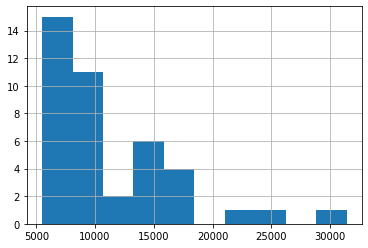

In [ ]:
final.price.hist(bins=10)

<AxesSubplot:xlabel='residual', ylabel='Density'>

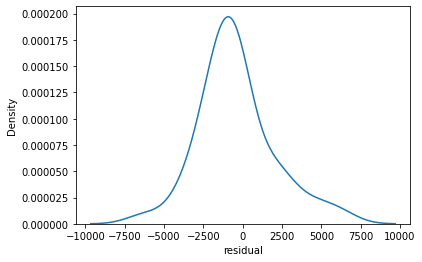

In [ ]:
sns.kdeplot(data=final, x='residual')

## How to identify categorical variables

In [ ]:
carsData.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
high_price            2
dtype: int64

## How to review categorical variables

### Dichotomous variables

In [ ]:
carsData.enginelocation.value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [ ]:
carsData.fueltype.value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [ ]:
carsData.aspiration.value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [ ]:
carsData.doornumber.value_counts()

four    115
two      90
Name: doornumber, dtype: int64

### Nominal variables

In [ ]:
carsData.fuelsystem.value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuelsystem, dtype: int64

In [ ]:
carsData.carbody.value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [ ]:
carsData.drivewheel.value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [ ]:
carsData.enginetype.value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [ ]:
carsData.cylindernumber.value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

## How to create dummy variables

In [ ]:
catColumns = ['aspiration','doornumber','carbody','drivewheel']
dummies = pd.get_dummies(carsData[catColumns])
dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   aspiration_std       205 non-null    uint8
 1   aspiration_turbo     205 non-null    uint8
 2   doornumber_four      205 non-null    uint8
 3   doornumber_two       205 non-null    uint8
 4   carbody_convertible  205 non-null    uint8
 5   carbody_hardtop      205 non-null    uint8
 6   carbody_hatchback    205 non-null    uint8
 7   carbody_sedan        205 non-null    uint8
 8   carbody_wagon        205 non-null    uint8
 9   drivewheel_4wd       205 non-null    uint8
 10  drivewheel_fwd       205 non-null    uint8
 11  drivewheel_rwd       205 non-null    uint8
dtypes: uint8(12)
memory usage: 2.5 KB


<AxesSubplot:>

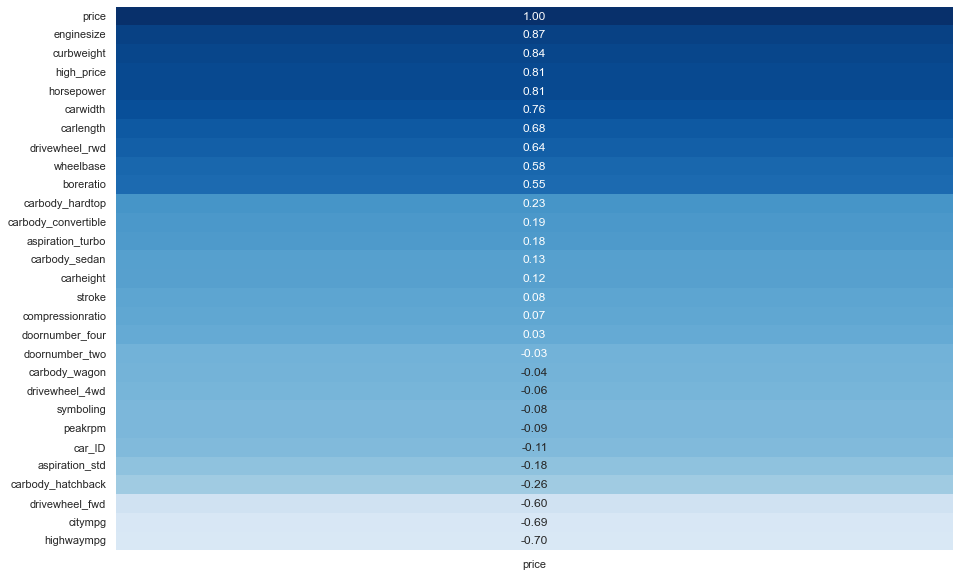

In [ ]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(data=dummies.corr()[['price']].sort_values('price', ascending=False), 
            annot=True, cmap='Blues', vmin=-1.0, vmax=1.0, cbar=False, fmt='.2f',square = False)

In [ ]:
carsDummies = carsData.drop(columns=catColumns)
carsDummies = carsDummies.join(dummies)
carsDummies.head(5)

,car_ID,symboling,CarName,fueltype,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd
0,1,3,alfa-romero giulia,gas,front,88.6,168.8,64.1,48.8,2548,...,0,1,1,0,0,0,0,0,0,1
1,2,3,alfa-romero stelvio,gas,front,88.6,168.8,64.1,48.8,2548,...,0,1,1,0,0,0,0,0,0,1
2,3,1,alfa-romero Quadrifoglio,gas,front,94.5,171.2,65.5,52.4,2823,...,0,1,0,0,1,0,0,0,0,1
3,4,2,audi 100 ls,gas,front,99.8,176.6,66.2,54.3,2337,...,1,0,0,0,0,1,0,0,1,0
4,5,2,audi 100ls,gas,front,99.4,176.6,66.4,54.3,2824,...,1,0,0,0,0,1,0,1,0,0


In [ ]:
carsDummies.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


<AxesSubplot:>

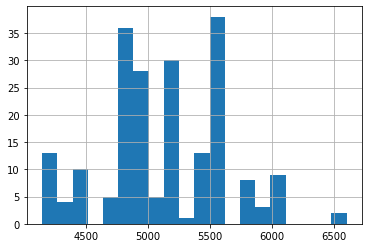

In [ ]:
carsDummies.peakrpm.hist(bins=20)

In [ ]:
numCols = ['wheelbase','carlength','carwidth','carheight','curbweight',
           'enginesize','boreratio','stroke','compressionratio','horsepower',
           'peakrpm','citympg','highwaympg']
carsDummies[numCols].describe().T

,count,mean,std,min,25%,50%,75%,max
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17
compressionratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,23.00
horsepower,205.0,104.117073,39.544167,48.00,70.00,95.00,116.00,288.00


## How to rescale the data and check the correlations

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
carsDummies[numCols] = scaler.fit_transform(carsDummies[numCols])
carsDummies[numCols].describe().T

,count,mean,std,min,25%,50%,75%,max
wheelbase,205.0,-1.291108e-15,1.002448,-2.023713,-0.708596,-0.292420,0.606521,3.686225
carlength,205.0,3.656696e-15,1.002448,-2.677244,-0.629655,-0.069006,0.735404,2.766741
carwidth,205.0,1.089643e-15,1.002448,-2.620512,-0.844782,-0.190566,0.463650,2.987056
carheight,205.0,-5.372396e-16,1.002448,-2.430664,-0.707626,0.153893,0.728239,2.492302
curbweight,205.0,1.126470e-16,1.002448,-2.055348,-0.790449,-0.272552,0.730512,2.907988
enginesize,205.0,3.466062e-17,1.002448,-1.586561,-0.719947,-0.166277,0.339248,4.792679
boreratio,205.0,2.252940e-15,1.002448,-2.923049,-0.665314,-0.073121,0.926204,2.258638
stroke,205.0,2.062307e-15,1.002448,-3.789311,-0.464834,0.110556,0.494149,2.923575
compressionratio,205.0,-3.639365e-16,1.002448,-0.793101,-0.389299,-0.288349,-0.187398,3.244916
horsepower,205.0,1.819683e-16,1.002448,-1.422573,-0.864871,-0.231119,0.301233,4.661448


In [ ]:
carsDummies.corr()[['price']].sort_values(by='price', ascending=False)
# carsDummies.drop(carsDummies["high_price"],inplace=True)


,price
price,1.000000
enginesize,0.874145
curbweight,0.835305
high_price,0.811616
horsepower,0.808139
carwidth,0.759325
carlength,0.682920
drivewheel_rwd,0.638957
wheelbase,0.577816
boreratio,0.553173


In [ ]:
carsDummies["big_engine"] = (carsData["enginesize"] > 150).astype(int)

## How to create a multiple regression that includes dummy variables

In [ ]:
carsTrain, carsTest = train_test_split(carsDummies, test_size=0.2, 
    random_state=20)

In [ ]:
model = LinearRegression()
xCols = ['enginesize','horsepower','carwidth',
         'drivewheel_fwd','drivewheel_rwd','highwaympg',"big_engine"]
model.fit(carsTrain[xCols], carsTrain['price'])

model.score(carsTest[xCols], carsTest['price'])
# two var - 0.7581072748679534
# xCols   = 0.7523820020019687
#numCols = 0.8021646959031423

0.7616125622943212

In [ ]:
y_predicted = model.predict(carsTest[numCols])

In [ ]:
predicted = pd.DataFrame(y_predicted, columns=['predictedPrice'])

final = predicted.join([carsTest[xCols].reset_index(drop=True),
                        carsTest['price'].reset_index(drop=True)])

final[['enginesize','horsepower','carwidth','drivewheel_rwd',
       'highwaympg','price','predictedPrice']].head()

,enginesize,horsepower,carwidth,drivewheel_rwd,highwaympg,price,predictedPrice
0,0.218885,0.149133,0.183272,0,-0.837195,15250.0,12230.080774
1,-0.888455,-0.864871,-1.078431,0,1.783034,8916.5,6539.555315
2,-0.840310,-1.067671,-1.078431,0,0.181783,8778.0,15010.691194
3,1.831749,4.661448,2.987056,1,-0.400490,31400.5,33034.208136
4,-0.840310,-1.067671,-1.078431,0,1.055193,6488.0,7559.191581


## How to select the independent variables

<AxesSubplot:>

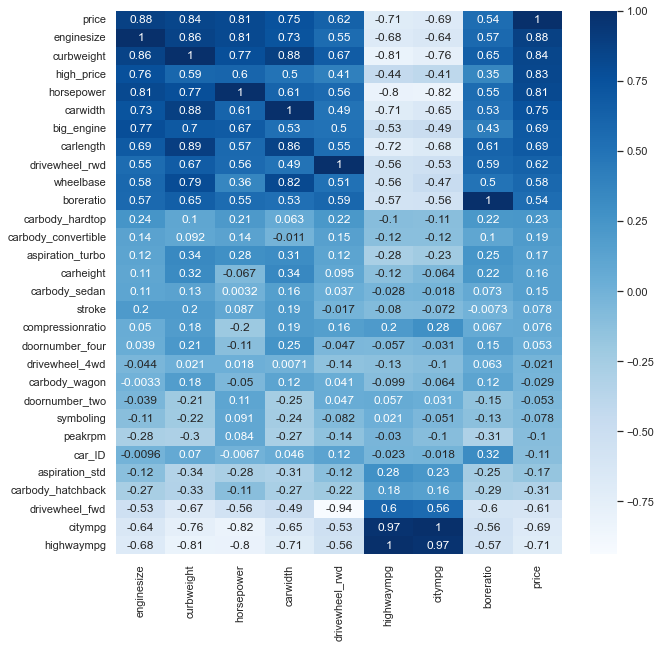

In [ ]:
# use Matplotlib to set the size of the plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))

# create the heatmap
sns.heatmap(carsTrain.corr()[['enginesize','curbweight','horsepower','carwidth',
                              'drivewheel_rwd','highwaympg','citympg','boreratio',
                              'price']].sort_values(by='price', ascending=False), 
            cmap='Blues', annot=True)

In [ ]:
numCols

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

## How to test different combinations of variables

### An initial model that's fitted to eight independent variables

In [ ]:
model = LinearRegression()
xCols = ['enginesize','curbweight','horsepower','carwidth', 'carlength',
         'drivewheel_rwd','highwaympg','citympg']
model.fit(carsTrain[xCols], carsTrain['price'])
model.score(carsTest[xCols], carsTest['price'])

0.739243731429341

In [ ]:
model.score(carsTrain[xCols], carsTrain['price'])

0.8344434015448826

### The initial model without the citympg column

In [ ]:
model = LinearRegression()
xCols = ['enginesize','curbweight','horsepower','carwidth','carlength',
         'drivewheel_rwd','highwaympg']
model.fit(carsTrain[xCols], carsTrain['price'])
model.score(carsTest[xCols], carsTest['price'])

0.7430944903647659

In [ ]:
model.score(carsTrain[xCols], carsTrain['price'])

0.8339017954221501

### A model that's fitted to all the numeric and dummy variables

In [ ]:
model = LinearRegression()
xCols = carsTrain.corr().drop(columns=['price']).columns.tolist()
model.fit(carsTrain[xCols], carsTrain['price'])
model.score(carsTest[xCols], carsTest['price'])

0.8147074771993627

In [ ]:
model.score(carsTrain[xCols], carsTrain['price'])

0.93881544766195

## How to use SciKit learn to select the variables

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [ ]:
carsTrain, carsTest = train_test_split(carsDummies.drop(
    columns=['CarName','fueltype','enginelocation','cylindernumber',
             'fuelsystem','enginetype']), test_size=0.2, random_state=20)

In [ ]:
carsTrain.shape

(164, 30)

In [ ]:
fs = SelectKBest(score_func=mutual_info_regression, k=20)
fs.fit(carsTrain.drop(columns=['price']), carsTrain['price'])

SelectKBest(k=20,
            score_func=<function mutual_info_regression at 0x000001D409213790>)

In [ ]:
x_train_fs = fs.transform(carsTrain.drop(columns=['price']))
x_test_fs = fs.transform(carsTest.drop(columns=['price']))

In [ ]:
type(x_test_fs)

numpy.ndarray

In [ ]:
x_test_fs

array([[ 6.00000000e+00,  2.00000000e+00,  1.73697752e-01,
         2.64133358e-01,  1.83271724e-01, -2.56354454e-01,
        -9.35021953e-02,  2.18884537e-01, -5.17265919e-01,
         4.62183319e-01, -4.14536952e-01,  1.49132694e-01,
         7.87855462e-01, -9.53011688e-01, -8.37195385e-01,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 4.50000000e+01,  1.00000000e+00, -7.08595876e-01,
        -1.47469173e+00, -1.07843101e+00, -7.07626346e-01,
        -1.31219568e+00, -8.88455154e-01, -1.10945866e+00,
        -4.64834168e-01, -1.36923259e-01, -8.64870700e-01,
         5.77692327e-01,  1.95834559e+00,  1.78303445e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 1.56000000e+02,  0.00000000e+00, -5.08831281e-01,
        -3.53393310e-01, -1.07843101e+00,  2.20512859e+00,
         1.06743331e+00, -8.40309950e-01, -1.03543457e+00,
        -7.20563129e-01, -2.8

In [ ]:
model = LinearRegression()
model.fit(x_train_fs, carsTrain['price'])
model.score(x_test_fs, carsTest['price'])

0.7928871323198385

In [ ]:
model.score(x_train_fs, carsTrain['price'])

0.9320539995644094

In [ ]:
df1 = pd.DataFrame(carsTrain.drop(columns=['price']).columns, columns=['feature'])
df1

,feature
0,car_ID
1,symboling
2,wheelbase
3,carlength
4,carwidth
5,carheight
6,curbweight
7,enginesize
8,boreratio
9,stroke


In [ ]:
df2 = pd.DataFrame(fs.scores_, columns=['importance'])
importance = df1.join(df2)
importance.sort_values('importance', ascending=False)

,feature,importance
6,curbweight,0.901819
14,highwaympg,0.878533
11,horsepower,0.874337
7,enginesize,0.844305
13,citympg,0.724799
4,carwidth,0.665872
2,wheelbase,0.585431
3,carlength,0.569772
0,car_ID,0.442887
8,boreratio,0.403809


In [ ]:
fs.scores_

array([0.44288654, 0.23208332, 0.58543113, 0.56977169, 0.6658719 ,
       0.30832093, 0.90181905, 0.84430503, 0.40380918, 0.34441113,
       0.11694634, 0.87433733, 0.23525352, 0.72479948, 0.87853319,
       0.32277146, 0.04970262, 0.04970262, 0.04346988, 0.04346988,
       0.        , 0.02626836, 0.14251444, 0.02670832, 0.01520275,
       0.        , 0.31609516, 0.3004548 , 0.30200676])

In [ ]:
model.coef_

array([  -10.95268211,   333.7877881 ,   619.305702  ,  -222.0315661 ,
        1636.1136396 ,   603.41016869,  -303.04913502,  1245.31510841,
        -194.67959649,  -476.42268501,   438.76488755,  2299.07804773,
         224.28674996, -1945.9319987 ,  1707.90936009, 10940.07315966,
        -869.18335887,  -878.62029893,  1329.10265002,    84.10256461])

In [ ]:
model.intercept_

13568.652092880338

## How to select the right number of variables

In [ ]:
model = LinearRegression()
testScores = []
trainScores = []

for i in range(1, len(carsTrain.columns)):
    fs = SelectKBest(score_func=mutual_info_regression, k=i)
    fs.fit(carsTrain.drop(columns=['price']), carsTrain['price'])

    x_train_fs = fs.transform(carsTrain.drop(columns=['price']))
    x_test_fs = fs.transform(carsTest.drop(columns=['price']))

    model.fit(x_train_fs, carsTrain['price'])
    
    testScore = model.score(x_test_fs, carsTest['price'])
    trainScore = model.score(x_train_fs, carsTrain['price'])
    testScores.append(testScore)
    trainScores.append(trainScore)
    
df = pd.DataFrame(data={'testScores':testScores, 'trainScores':trainScores})
df.reset_index(inplace=True)
df.rename(columns={'index':'numFeatures'}, inplace=True)
df.numFeatures = df.numFeatures + 1


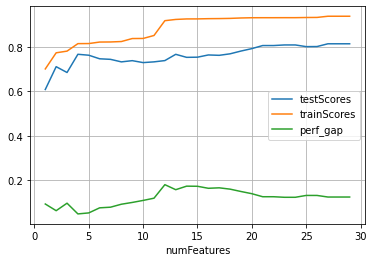

In [ ]:
df['perf_gap'] = df['trainScores'] - df['testScores']
g = df.plot(x='numFeatures', y=['testScores','trainScores','perf_gap'], grid = True)

<AxesSubplot:xlabel='numFeatures'>

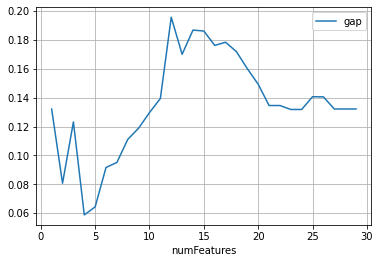

In [ ]:
# Or, if you only want to plot the gap, you could do it like this...
df['gap'] = (df['trainScores'] - df['testScores'])/df['trainScores']
df.plot(x='numFeatures', y=['gap'], grid = True)